In [146]:
#Import standard data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
#Import data into pandas dataframe object
filename = 'meat_consumption_worldwide.csv'
df = pd.read_csv(filename)

#Define aggregate groups within data eg BRICS - (Brazil, Russia, India,
#China, South Africa) These can be removed later to clean data
agg_groups = ['WLD', 'BRICS', 'OECD', 'EU28', 'SSA']

In [148]:
df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


In [149]:
#Find average values for each measure type, to find relative weight
#KG_CAP - kg per person (CONSUMPTION/POPULATION)
#THND_TONNE - total annual consumption
print('Avg KG_CAP measure: (kg)', 
      str(df.Value[df.MEASURE == 'KG_CAP'].mean()))
print('Avg THND_TONNE measure: (1000t)', 
      str(df.Value[df.MEASURE == 'THND_TONNE'].mean()), '\n')

#Find measure proportions for different meats
for meat in list(df.SUBJECT.unique()):
    print(f'{meat}: \n',
          str(df.MEASURE[df.SUBJECT == f'{meat}'].value_counts()), '\n')

Avg KG_CAP measure: (kg) 9.17381924988234
Avg THND_TONNE measure: (1000t) 3628.9941753056414 

BEEF: 
 THND_TONNE    1740
KG_CAP        1659
Name: MEASURE, dtype: int64 

PIG: 
 THND_TONNE    1764
KG_CAP        1683
Name: MEASURE, dtype: int64 

POULTRY: 
 THND_TONNE    1769
KG_CAP        1688
Name: MEASURE, dtype: int64 

SHEEP: 
 THND_TONNE    1769
KG_CAP        1688
Name: MEASURE, dtype: int64 



In [150]:
#Check if measures are standardised in countries, then print 
#countries with inconsistencies, ignoring aggregate groups
countries = list(df.LOCATION.unique())
inconsistent_countries = []
for country in countries:
    if len(df.MEASURE[df.LOCATION == f'{country}'].unique()) == 1: pass
    elif country in agg_groups: pass #ignore aggregate groups
    else:
        inconsistent_countries.append(country)

print("List of countries with inconsistent measure: \n", 
      str(inconsistent_countries))

List of countries with inconsistent measure: 
 ['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA', 'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA', 'HTI', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'MYS', 'MOZ', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'THA', 'UKR', 'URY', 'VNM', 'ZMB']


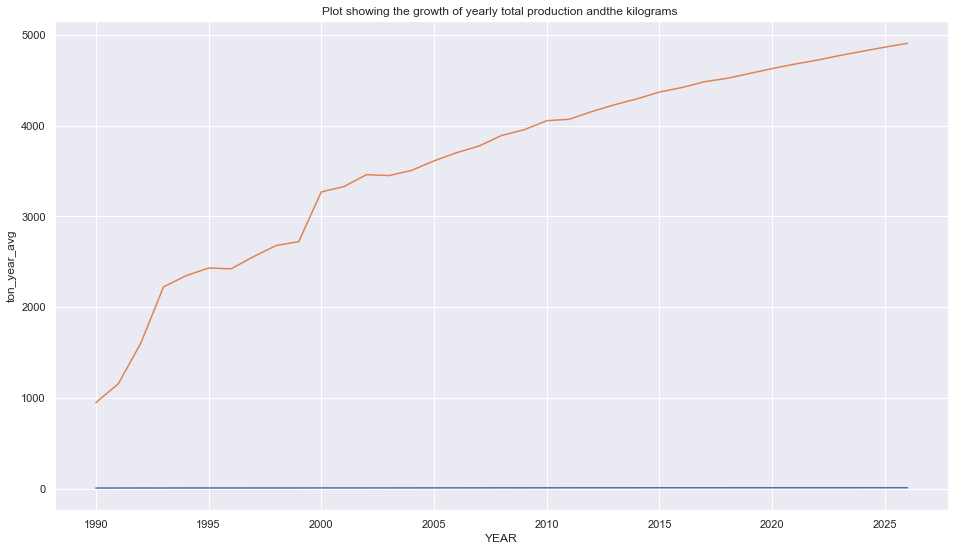

In [155]:
#Plot global average of meat consuption, separating the measures into
#different subplots
dropcolumns = ["LOCATION", "MEASURE"]
kg = df[df.MEASURE == 'KG_CAP'].drop(columns = dropcolumns)
ton = df[df.MEASURE == 'THND_TONNE'].drop(columns = dropcolumns)

#Duplicate time column to reindex both dataframes on the year
kg['YEAR'], ton['YEAR'] = kg['TIME'], ton['TIME']
kg.set_index('TIME')
ton.set_index('TIME')

#Calculate the country average by year
years, avs = list(df.TIME.unique()), dict()
for year in years:
    avs[year] = [year, kg.Value[kg.YEAR == year].mean(),
                   ton.Value[ton.YEAR == year].mean()]

avs = pd.DataFrame.from_dict(avs, orient='index')
#Rename new column
avs = avs.rename(columns = {0 : 'YEAR',
                            1 : 'kgpp_year_avg',
                            2: 'ton_year_avg'})


plt.figure(figsize = (16,9)) #figure size with ratio 16:9
sns.set(style = 'darkgrid')
for column in ['kgpp_year_avg', 'ton_year_avg']:
    sns.lineplot(x = 'YEAR', y = f'{column}', data = avs,
                legend = 'brief')
plt.title("Plot showing the growth of yearly total production and" +
         "the kilograms ")
plt.show()

In [143]:
avs.head()

,YEAR,kgpp_year_avg,ton_year_avg
1991,1991,7.361461,1157.199372
1992,1992,7.743622,1605.491678
1993,1993,7.635007,2222.693572
1994,1994,7.929439,2345.958159
1995,1995,7.883367,2431.098108
